# Calibration curves

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

## Data

In [2]:
llr_raw = np.load("../data/results/llr_alices_fix_grid.npy")
llr_cal = np.load("../data/results/llr_calibrated_alices_fix_grid.npy")

In [4]:
resolution = 25

f_sub_1d = np.linspace(0.001, 0.200, resolution)
beta_1d = np.linspace(-2.5, -1.5, resolution)

theta0, theta1 = np.meshgrid(f_sub_1d, beta_1d)
theta_grid = np.vstack((theta0.flatten(), theta1.flatten())).T

bin_size = f_sub_1d[1] - f_sub_1d[0]
alpha_edges = np.linspace(f_sub_1d[0] - bin_size/2, f_sub_1d[-1] + bin_size/2, resolution + 1)
bin_size = beta_1d[1] - beta_1d[0]
beta_edges = np.linspace(beta_1d[0] - bin_size/2, beta_1d[-1] + bin_size/2, resolution + 1)

In [5]:
for i in range(625):
    print(i, theta_grid[i])

0 [ 1.0e-03 -2.5e+00]
1 [ 0.00929167 -2.5       ]
2 [ 0.01758333 -2.5       ]
3 [ 0.025875 -2.5     ]
4 [ 0.03416667 -2.5       ]
5 [ 0.04245833 -2.5       ]
6 [ 0.05075 -2.5    ]
7 [ 0.05904167 -2.5       ]
8 [ 0.06733333 -2.5       ]
9 [ 0.075625 -2.5     ]
10 [ 0.08391667 -2.5       ]
11 [ 0.09220833 -2.5       ]
12 [ 0.1005 -2.5   ]
13 [ 0.10879167 -2.5       ]
14 [ 0.11708333 -2.5       ]
15 [ 0.125375 -2.5     ]
16 [ 0.13366667 -2.5       ]
17 [ 0.14195833 -2.5       ]
18 [ 0.15025 -2.5    ]
19 [ 0.15854167 -2.5       ]
20 [ 0.16683333 -2.5       ]
21 [ 0.175125 -2.5     ]
22 [ 0.18341667 -2.5       ]
23 [ 0.19170833 -2.5       ]
24 [ 0.2 -2.5]
25 [ 1.00000000e-03 -2.45833333e+00]
26 [ 0.00929167 -2.45833333]
27 [ 0.01758333 -2.45833333]
28 [ 0.025875   -2.45833333]
29 [ 0.03416667 -2.45833333]
30 [ 0.04245833 -2.45833333]
31 [ 0.05075    -2.45833333]
32 [ 0.05904167 -2.45833333]
33 [ 0.06733333 -2.45833333]
34 [ 0.075625   -2.45833333]
35 [ 0.08391667 -2.45833333]
36 [ 0.0922083

In [7]:
theta_idx = [356, 387, 31]

print(theta_grid[theta_idx])

[[ 0.05075    -1.91666667]
 [ 0.1005     -1.875     ]
 [ 0.05075    -2.45833333]]


In [12]:
llr_calibration_nums = [np.load("../data/results/llr_alices_fix_calibrate_theta_{}.npy".format(i)) for i in theta_idx]
llr_calibration_den = np.load("../data/results/llr_alices_fix_calibrate_ref.npy")
print(llr_calibration_den.shape, llr_calibration_nums[0].shape, llr_calibration_nums[1].shape, llr_calibration_nums[2].shape)


(5000,) (5000,) (1000,) (5000,)


## Plot calibration curves

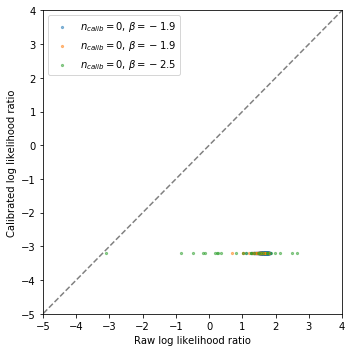

In [14]:
skip=10

fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([-100.,100.], [-100.,100.], ls="--", c="0.5")
for i in theta_idx:
    plt.scatter(
        llr_raw[i][::skip], llr_cal[i][::skip], s=5., alpha=0.5,
        label=r"$n_{{calib}} = {:.0f}$, $\beta = {:.1f}$".format(theta_grid[i,0], theta_grid[i,1])
    )
    
plt.legend()
    
#ax.set_yscale("log")
plt.xlim(-5., 4.)
plt.ylim(-5., 4.)
#plt.ylim(1.e-3, 2.)

plt.xlabel(r"Raw log likelihood ratio")
plt.ylabel(r"Calibrated log likelihood ratio")
    
plt.tight_layout()
plt.savefig("../figures/calibration_curve.pdf")

## Calibration histos

In [22]:
llr_calibration_nums[2].shape

(5000,)

In [20]:
llr_calibration_den.shape

(5000,)

In [15]:
llr_range= -5., 4.

fig = plt.figure(figsize=(3*5,5))

for panel in range(3):
    ax = plt.subplot(1,3,panel+1)

    for num in llr_calibration_nums[panel]:
        plt.hist(
            num, range=llr_range, bins=50, histtype="step", lw=1.5,
            #label=r"$n_{{calib}} = {:.0f}$, $\beta = {:.1f}$".format(theta_grid[i,0], theta_grid[i,1])
        )
    plt.hist(
        llr_calibration_den[theta_idx[panel]], range=llr_range, bins=50, histtype="step",
        lw=1.5, color="black",
        #label=r"Reference (marginal model)"
    )
    #plt.legend(loc="upper left")

    #ax.set_yscale("log")
    plt.xlim(*llr_range)
    #plt.ylim(1.,1.e4)
    plt.xlabel(r"Raw log likelihood ratio")
    
plt.tight_layout()
plt.savefig("../figures/calibration_histograms.pdf")


/Users/johannbrehmer/anaconda3/envs/lensing/lib/python3.6/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)
/Users/johannbrehmer/anaconda3/envs/lensing/lib/python3.6/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


ValueError: Image size of 880x95043 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x360 with 3 Axes>